Sources:
https://www.geeksforgeeks.org/a-search-algorithm/

- Explain what the idea of this algorithm is
- Explain the general steps of this algorithm
- Say what the time complexity is 

### A* search algorithm steps:

1. 
2.
3.


Starting A* algorithm!
Found a path from B to E:  ['B', 'D', 'H', 'E']


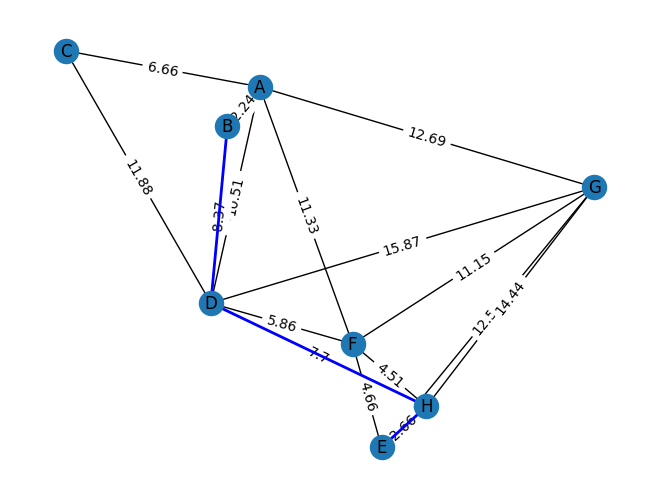

In [1]:
# code goes here!
from math import inf, sqrt
from heapq import heappop, heappush
from visualization import visualize_graph


class graph_vertex:
  """
    A class representing a vertex in the graph.

    Attributes:
        name (str): The name of the vertex.
        position (tuple): The (x, y) coordinates of the vertex on a 2D plane.
  """
  def __init__(self, name, x, y):
    self.name = name
    self.position = (x, y)

# Define vertices with their geographic coordinates
a = graph_vertex("A", 28.6448, 77.216721)
b = graph_vertex("B", 26.92207, 75.778885)
c = graph_vertex("C", 25.321684, 82.987289)
d = graph_vertex("D", 19.07283, 72.88261)
e = graph_vertex("E", 13.067439, 80.237617)
f = graph_vertex("F", 17.387140, 78.491684)
g = graph_vertex("G", 22.572645, 88.363892)
h = graph_vertex("H", 12.972442, 77.580643)

euclidean_graph = {
  a: set([(b, 2.243918), (c, 6.65902), (d, 10.507479), (f, 11.329626), (g, 12.693718)]),
  b: set([(d, 8.366539), (a, 2.243918)]),
  c: set([(a, 6.65902), (d, 11.88077)]),
  d: set([(a, 10.507479), (b, 8.366539), (c, 11.88077), (f, 5.856898), (g, 15.87195), (h, 7.699756)]),
  e: set([(g, 12.50541), (f, 4.659195), (h, 2.658671)]),
  f: set([(a, 11.329626), (d, 5.856898), (e, 4.659195), (h, 4.507721), (g, 11.151231)]),
  g: set([(a, 12.693718), (d, 15.87195), (e, 12.50541), (f, 11.151231), (h, 14.437532)]),
  h: set([(d, 7.699756), (e, 2.658671), (f, 4.507721), (g, 14.437532)])
}

# Euclidean Heuristic:
def heuristic(start, target):
  """
    Heuristic function for A* algorithm, calculates the Euclidean distance between two vertices.

    Parameters:
        start (graph_vertex): The starting vertex.
        target (graph_vertex): The target vertex.

    Returns:
        float: The Euclidean distance between the start and target vertices.
  """
  x_distance = abs(start.position[0] - target.position[0])
  y_distance = abs(start.position[1] - target.position[1])
  return sqrt(x_distance * x_distance + y_distance * y_distance)

def a_star(graph, start, target):
    """
    Implements the A* search algorithm to find the shortest path between two vertices in a graph.

    Parameters:
        graph (dict): A dictionary representing the graph where keys are vertices and values are sets of tuples (neighbor, edge_weight).
        start (graph_vertex): The starting vertex for the path.
        target (graph_vertex): The target vertex for the path.

    Returns:
        list: The shortest path from start to target as a list of vertex names.
    """
    print("Starting A* algorithm!")

    # Initialize a dictionary to store the total cost (distance) and path for each vertex.
    # The cost is initially set to infinity for all vertices except the start vertex.
    paths_and_distances = {}
    for vertex in graph:
        paths_and_distances[vertex] = [inf, [start.name]]
    paths_and_distances[start][0] = 0

    # A priority queue to determine the next vertex to visit based on the estimated cost.
    vertices_to_explore = [(0, start)]

    # The algorithm runs until there are no vertices left to explore or the target is reached.
    while vertices_to_explore and paths_and_distances[target][0] == inf:
        # Pop the vertex with the lowest cost estimate.
        current_distance, current_vertex = heappop(vertices_to_explore)

        # Explore the neighbors of the current vertex.
        for neighbor, edge_weight in graph[current_vertex]:
            # Calculate the new cost (distance) to the neighbor.
            new_distance = current_distance + edge_weight + heuristic(neighbor, target)
            new_path = paths_and_distances[current_vertex][1] + [neighbor.name]
            
            # If the new cost is lower than the previously recorded cost, update the cost and path.
            if new_distance < paths_and_distances[neighbor][0]:
                paths_and_distances[neighbor][0] = new_distance
                paths_and_distances[neighbor][1] = new_path
                # Add the neighbor to the priority queue with the updated cost.
                heappush(vertices_to_explore, (new_distance, neighbor))
                
    # Once the target is reached, or all vertices are explored, return the shortest path found.
    print("Found a path from {0} to {1}: ".format(start.name, target.name), paths_and_distances[target][1])
    return paths_and_distances[target][1]

# Usage of A* algorithm
shortest_path = a_star(euclidean_graph, b, e)

def create_edge_dict(graph):
  """
    Converts a graph into a dictionary for edge visualization.

    Parameters:
        graph (dict): A dictionary representing the graph.

    Returns:
        dict: A dictionary where keys are tuples (start_vertex_name, end_vertex_name) and values are edge weights.
  """
  edge_dict = {}
  for key, connections in graph.items():
    for conn in connections:
        edge_dict[(key.name, conn[0].name)] = conn[1]
            
  return edge_dict

# Visualization of the graph
graph_edge_dict = create_edge_dict(euclidean_graph)
visualize_graph(graph_edge_dict, shortest_path)
